# Neighborhoods with the Most Medical Facilities

Now we want to look at the neighborhoods that have the most medical facilities. Our ideal neighborhood will have at least 1 medical facility.

In [ ]:
import pandas as pd
import fpsnippets
import matplotlib.pyplot as plt

In [12]:
# read in dataset
data = pd.read_csv("medicalCare.csv", index_col = "_id")
data

,GROUP_NAME,PRACTICE_ADDR_1,PRACTICE_ADDR_2,PRACTICE_CITY,PRACTICE_STATE,PRACTICE_ZIP,Latitude,Longitude
_id,,,,,,,,
1,"Picciotti, Isabella M MD",1 Allegheny Square,NaN,Pittsburgh,PA,15212,40.451948,-80.004895
2,UPMC Emergency Medicine Inc,1 Childrens Hospital Drive,4401 Penn Avenue,Pittsburgh,PA,15224,40.467315,-79.953590
3,Hoover Medical Associates PC,100 Delafield Rd,Suite 312,Pittsburgh,PA,15215,40.490244,-79.895719
4,Partners in Nephrology and Endocrinology,100 Delafield Road,100 MAB Suite 212,Pittsburgh,PA,15215,40.506845,-79.908076
5,Bahl and Bahl Med Assoc,"100 Delafield Road, Ste 103",NaN,Pittsburgh,PA,15215,40.490244,-79.895719
...,...,...,...,...,...,...,...,...
603,Pittsburgh VA Medical Group,University Drive 111 C-U,NaN,Pittsburgh,PA,15240,40.488899,-79.890069
604,Pittsburgh VA Medical Group,University Drive C,NaN,Pittsburgh,PA,15240,40.445036,-79.958921
605,Pittsburgh VA Medical Group,University Drive C-124E-U,NaN,Pittsburgh,PA,15213,40.437926,-79.955642


<BarContainer object of 43 artists>

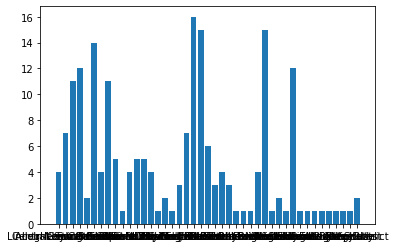

In [17]:
# takes each row of latitudes and appends into lat array
lat = []
for index, row in data.iterrows():
    latit= row['Latitude']
    lat.append(latit)

# takes each row of longitudes and appends into long array
long = []
for index, row in data.iterrows():
    longit = row['Longitude']
    long.append(longit)

# takes each elements from lat and long array and uses fpsnippets latitude and longitude method to append each neighborhood into neighborhood array
count = 0
neighborhood = []
while (count < 607):
    neighborhood.append(fpsnippets.geo_to_neighborhood(lat[count], long[count]))
    count = count + 1

# if fpsnippets produced None/is not a string, append into updated array of neighborhoods
updatedNbh = list()
for x in neighborhood:
    if type(x) == str:
        updatedNbh.append(x)

nbhDic = dict()

# for each neighborhood in list, add 1 if there is a repeat neighborhood
for y in updatedNbh:
    if not y in nbhDic:
        nbhDic.update({y : 1})
    else: 
        nbhDic[y] = nbhDic.get(y) + 1

# plots data into bar graph
plt.bar(nbhDic.keys(), nbhDic.values())

{'West Oakland': 16, 'Central Oakland': 15, 'Bloomfield': 15, 'South Side Flats': 14, 'North Oakland': 12, 'Shadyside': 12, 'Lincoln-Lemington-Belmar': 11, 'Central Business District': 11, 'Central Lawrenceville': 7, 'Squirrel Hill South': 7, 'East Liberty': 6, 'Garfield': 5, 'Bluff': 5, 'Squirrel Hill North': 5, 'Allegheny Center': 4, 'Brookline': 4, 'Central Northside': 4, 'Mount Washington': 4, 'South Oakland': 4, 'Greenfield': 4}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

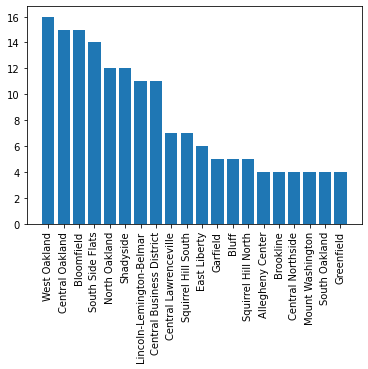

In [20]:
# prints top twenty neighborhoods with the most medical facilities
N = 20
topTwenty = dict(sorted(nbhDic.items(), key = lambda x: x[1], reverse = True)[:N])
print(topTwenty)

# plots data into bar graph
plt.bar(topTwenty.keys(), topTwenty.values())

# makes neighborhood title vertical
plt.xticks(rotation = 90)

{'Chateau': 1, 'Troy Hill': 1, 'Morningside': 1, 'Point Breeze North': 1, 'Terrace Village': 1, 'Lower Lawrenceville': 1, 'West End': 1, 'Hazelwood': 1, 'Northview Heights': 1, 'Lincoln Place': 1, 'Homewood West': 1, 'Point Breeze': 1, 'Homewood South': 1, 'East Allegheny': 1, 'Allegheny West': 1, 'Glen Hazel': 1, 'South Shore': 2, 'Carrick': 2, 'Brighton Heights': 2, 'Strip District': 2}


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text major ticklabel objects>)

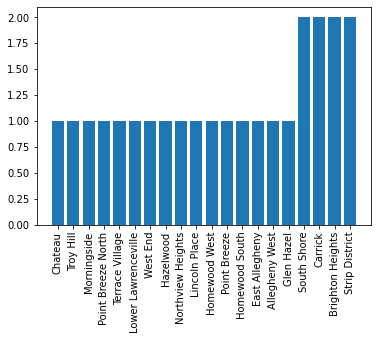

In [19]:
#South Side Flats, East Liberty, Squirrel Hill South, Garfield, Mount Washington, South Oakland

# prints lowest twenty neighborhoods that have the least amount of medical facilities
N = 20
lowTwenty = dict(sorted(nbhDic.items(), key = lambda x: x[1])[:N])
print(lowTwenty)

# plots data into bar graph
plt.bar(lowTwenty.keys(), lowTwenty.values())

# makes neighborhood title vertical
plt.xticks(rotation = 90)